# 02 Dataset Overview

数据集统计与探索，包括数据形状、损伤分布、传感器响应等。

In [2]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_loader import load_dataset, get_time_array
from utils.config import DATASET_PATH, DT

## 加载数据集

In [3]:
# 加载数据集
data = load_dataset(DATASET_PATH, normalize=False)

print("=" * 50)
print("数据集形状信息")
print("=" * 50)
print(f"载荷 (load): {data['load'].shape}")
print(f"位移 (disp): {data['disp'].shape}")
print(f"应力 (stress): {data['stress'].shape}")
print(f"损伤 (damage): {data['damage'].shape}")

数据集形状信息
载荷 (load): (20000, 201, 14)
位移 (disp): (20000, 201, 14)
应力 (stress): (20000, 201, 11)
损伤 (damage): (20000, 11)


## 数据集统计

In [4]:
print("\n数据统计:")
print("-" * 50)
print(f"样本数 (N): {data['damage'].shape[0]}")
print(f"时间步数 (T): {data['disp'].shape[1]}")
print(f"单元数: {data['damage'].shape[1]}")
print(f"自由度: {data['disp'].shape[2]}")

print(f"\n载荷范围: [{data['load'].min():.4f}, {data['load'].max():.4f}]")
print(f"位移范围: [{data['disp'].min():.6f}, {data['disp'].max():.6f}]")
print(f"应力范围: [{data['stress'].min():.4f}, {data['stress'].max():.4f}]")
print(f"损伤范围: [{data['damage'].min():.4f}, {data['damage'].max():.4f}]")


数据统计:
--------------------------------------------------
样本数 (N): 20000
时间步数 (T): 201
单元数: 11
自由度: 14

载荷范围: [-41737.0991, 24973.9631]
位移范围: [-0.000781, 0.000448]
应力范围: [0.0000, 19251189.6508]
损伤范围: [0.5000, 1.0000]


## 损伤分布直方图

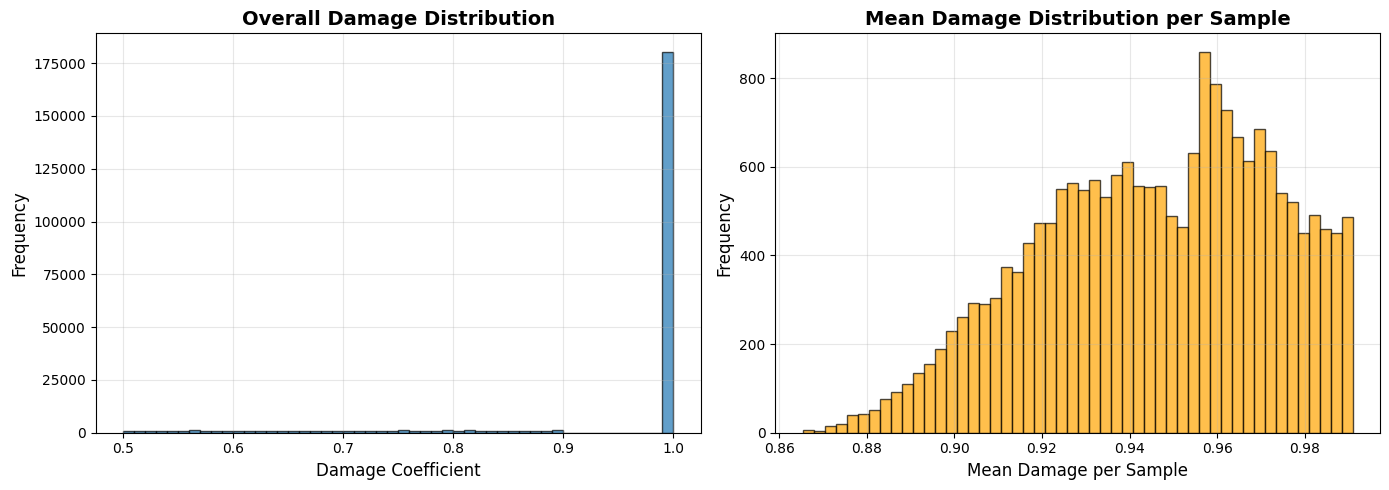

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 所有样本的损伤分布
all_damage = data['damage'].flatten()
axes[0].hist(all_damage, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Damage Coefficient', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Overall Damage Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 每个样本的平均损伤
mean_damage_per_sample = data['damage'].mean(axis=1)
axes[1].hist(mean_damage_per_sample, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Mean Damage per Sample', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Mean Damage Distribution per Sample', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 典型样本响应时程

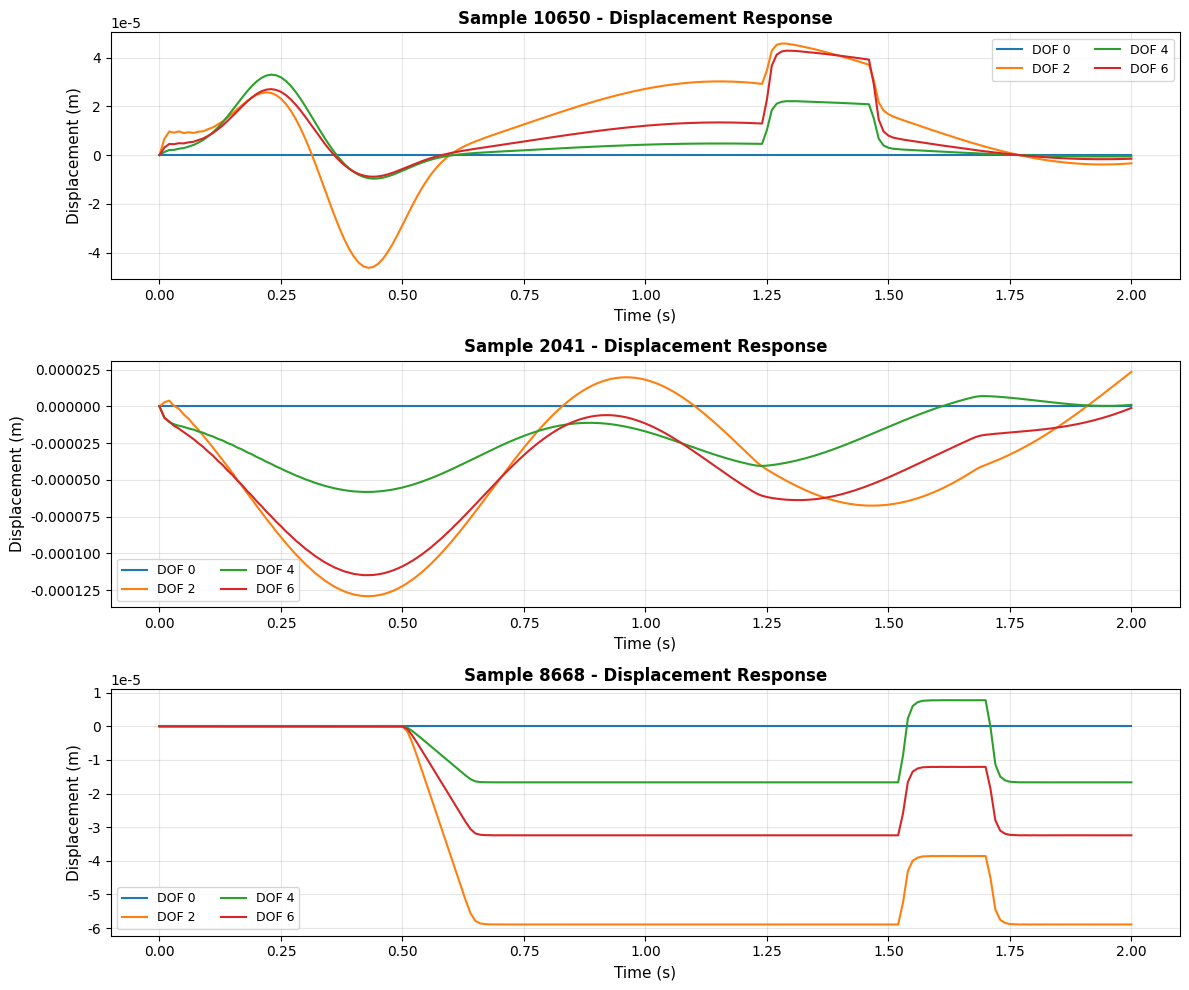

In [6]:
# 生成时间数组
t = get_time_array(data['disp'].shape[1], DT)

# 随机选择几个样本
np.random.seed(42)
sample_indices = np.random.choice(data['disp'].shape[0], 3, replace=False)

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for idx, sample_idx in enumerate(sample_indices):
    # 选择几个自由度的位移显示
    dofs_to_show = [0, 2, 4, 6]
    
    for dof in dofs_to_show:
        axes[idx].plot(t, data['disp'][sample_idx, :, dof], label=f'DOF {dof}')
    
    axes[idx].set_xlabel('Time (s)', fontsize=11)
    axes[idx].set_ylabel('Displacement (m)', fontsize=11)
    axes[idx].set_title(f'Sample {sample_idx} - Displacement Response', fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9, ncol=2)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 载荷类型分布

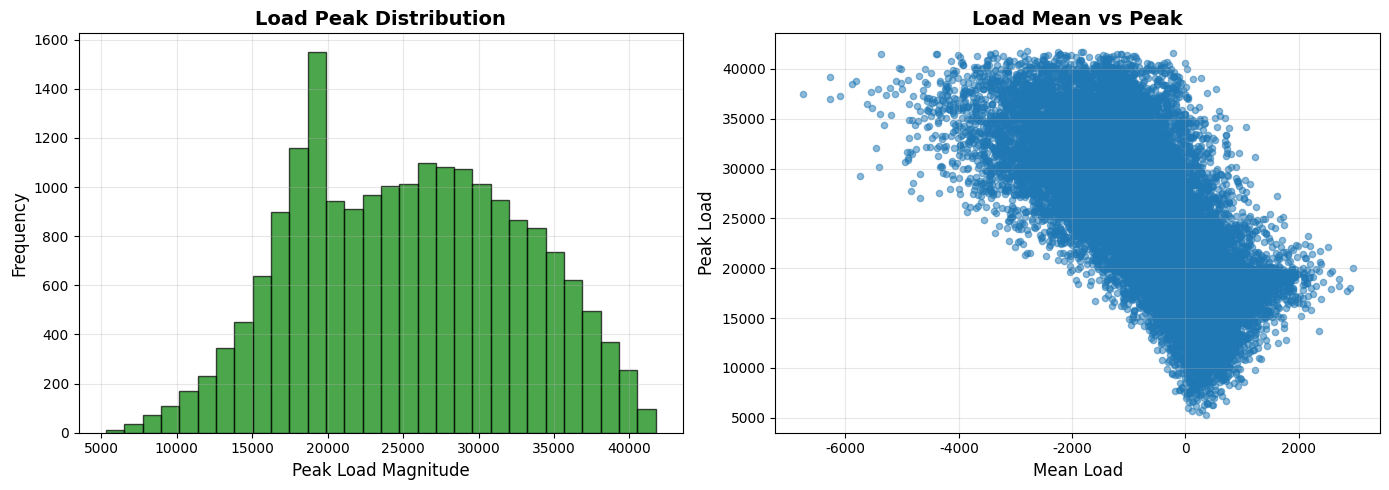

In [7]:
# 分析载荷特征
load_peaks = np.max(np.abs(data['load']), axis=(1, 2))
load_means = np.mean(data['load'], axis=(1, 2))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(load_peaks, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Peak Load Magnitude', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Load Peak Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(load_means, load_peaks, alpha=0.5, s=20)
axes[1].set_xlabel('Mean Load', fontsize=12)
axes[1].set_ylabel('Peak Load', fontsize=12)
axes[1].set_title('Load Mean vs Peak', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()